### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 2
### Due: Friday, Feb 4th at 11.59pm CST
---

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

1) Write down the usual form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

2) Manipulate the above equation such that you can write the left hand side in terms of a normalized half-Gaussian distribution. 

3) Draw $N=10^5$ samples from a $\sigma=3$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your equation in (2). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

4) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

5) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

### 1)
form of full (normalized) gaussian with $\mu=0$: 
$$p(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{x^2}{2\sigma^2}}$$

General (unnormalized) form of half gaussian:
$$p(x)=ae^{-\frac{(x)^2}{2\sigma^2}} \,when\, x\geq0$$

This should be a piecewise function with $p(x)=0$ if $x<0$. In the gaussian integral, the unnormalized function evaluates to $a\sqrt{2\pi\sigma^2}$. A half gaussian cuts of exactly half of this value; This means that the unnormalized half gaussian evaluates to 

$$a\frac{\sqrt{2\pi\sigma^2}}{2}=a\frac{\sqrt{\pi\sigma^2}}{\sqrt{2}}$$

which, when set equal to 1 to normalize:

$$a\frac{\sqrt{\pi\sigma^2}}{\sqrt{2}}=1$$
$$a = \sqrt{\frac{2}{\pi\sigma^2}}$$

This makes the normalize half gaussian
$$p(x)=\sqrt{\frac{2}{\pi\sigma^2}}e^{-\frac{x^2}{2\sigma^2}} \,when\, x\geq0$$
---

## 2)

Multiply the left side of the integral equation by the half gaussian normalization over itself:
$a = \sqrt{\frac{2}{\pi\sigma^2}}$

$$\sqrt{\frac{\pi\sigma^2}{2}}\int_0^{\infty}x^3 \sqrt{\frac{2}{\pi\sigma^2}}e^{-\frac{x^2}{2\sigma^2}}\,dx = 2\sigma^4 $$

defining the normalized half gaussian pdf as $nhg(x)$:

$$\sqrt{\frac{\pi\sigma^2}{2}}\int_0^{\infty}x^3\,nhg(x)\,dx = 2\sigma^4 $$

In [149]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm, uniform, poisson
from astroML import stats as astroMLstats

data points left after masking: 49783


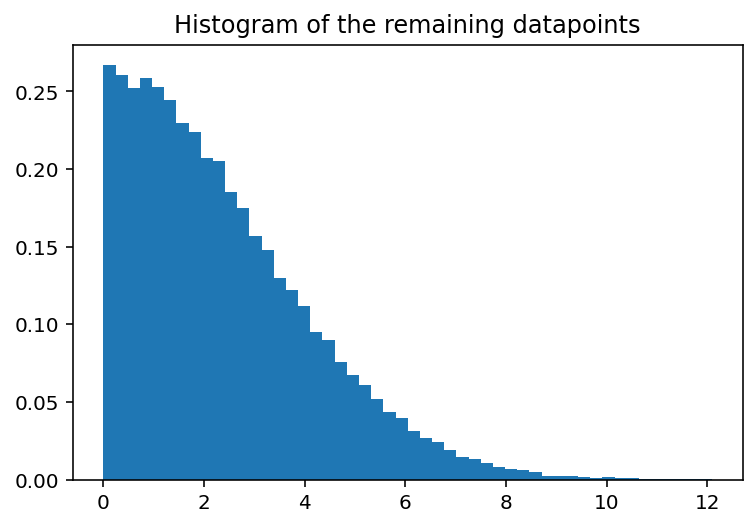

Numerical approximation: 162.5935260178935
Analytic value: 162


In [138]:
"""
Draw  𝑁=105  samples from a  𝜎=3  normal distribution, mask the samples such that only positive 
values are accepted, then perform Monte Carlo integration using your equation in (2). Confirm 
that this approximately matches the value computed from the right hand side of the equation. If 
you don't get approximately matching values then you may have forgotten normalization factors 
for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian."""
sigma = 3
N=int(1e5)
normal = norm(loc=0,scale=sigma)
data = normal.rvs(N)
data = data[data>=0]

#It is a bit unclear if you are looking for 10**5 data points before or after masking.
#Based on the language, I intepreted it as before, hence the lower number of datapoints
print(f'data points left after masking: {len(data)}')
plt.hist(data,bins=50,density=True)
plt.title('Histogram of the remaining datapoints')
plt.show()

def func(x):
    #To go from a gaussian pdf to half gaussian over the positive interval, simply multiply by 2
    return np.sqrt(np.pi*sigma**2 / 2) * x**3 * 2*normal.pdf(x)

#To go from a pdf of a gaussian to half gaussian, we need to multiply it by 2
integral = np.sum( func(data) /(2*normal.pdf(data)) )/len(data)

calc_value = 2*sigma**4
print(f'Numerical approximation: {integral}')
print(f'Analytic value: {calc_value}')

In [139]:
"""
Repeat (3) for  𝑁=[10^2,10^3,10^4] , computing the integral using  100  different batches 
of random samples for each  𝑁 . Record all calculated values at all  𝑁 .
"""
N_val = np.array([1e2,1e3,1e4,1e5],dtype=int)

def gaussian_monte_carlo_integral(N_array,sigma,iterations=100):
    normal = norm(loc=0,scale=sigma)
    
    #A list of arrays of each integral
    intForN = []
    
    for N in N_array:
        #Need 'iterations' number of gaussian draws
        data = [normal.rvs(N) for i in range(iterations)]
        #Mask positive values
        data = [d[d>=0] for d in data]
    
        #Using the function defined in the last cell, calculate the integral
        integral = [np.sum( func(d) /(2*normal.pdf(d)) )/len(d) for d in data]
        intForN.append(np.array(integral))
    
    return np.array(intForN)
    
    
int_vals = gaussian_monte_carlo_integral(N_val,3)

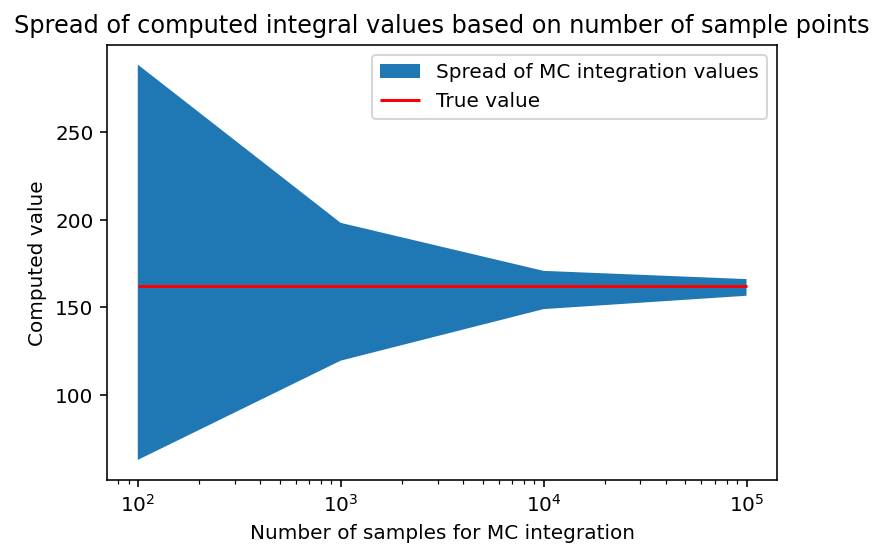

In [141]:
"""
Make a plot that shows  log10𝑁  along the  𝑥 -axis and the spread between the maximum 
and minimum Monte Carlo integral values that you get at each  𝑁  on the  𝑦 -axis. 
(Note: matplotlib's fill_between command is useful for this). Plot a horizontal line on 
the same figure to show the precise mathematical value. You should see that Monte Carlo 
integration results in less numerical spread as  𝑁  gets larger.
"""

max_int = np.array([max(i) for i in int_vals])
min_int = np.array([min(i) for i in int_vals])


plt.fill_between(N_val,min_int,max_int,label='Spread of MC integration values')
#Plot true value in red
plt.hlines(calc_value,1e2,1e5,colors='r',label='True value')
plt.xscale('log')
plt.title('Spread of computed integral values based on number of sample points')
plt.ylabel('Computed value')
plt.xlabel('Number of samples for MC integration')
plt.legend(loc='upper right')
plt.show()

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

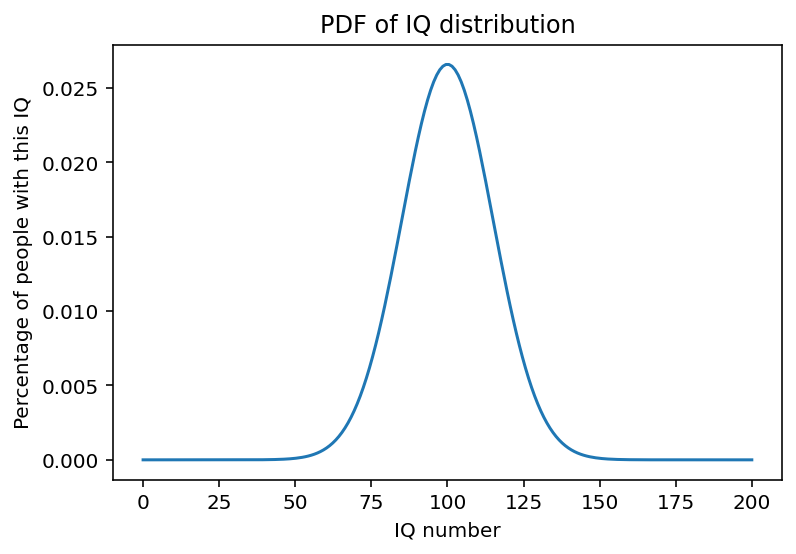

Random draws: [116.61692932  91.5145631  112.96882203 101.12658857  94.72576226
  83.62165075  87.90113335 101.1671282   95.42924628  81.30714512]
PDF at x=145: 0.0002954565607958672


In [142]:
iq_norm = norm(loc=100,scale=15)
x_grid = np.linspace(0,200,200)
plt.plot(x_grid,iq_norm.pdf(x_grid))
plt.title('PDF of IQ distribution')
plt.xlabel('IQ number')
plt.ylabel('Percentage of people with this IQ')
plt.show()

#Print 10 random draws
draws = iq_norm.rvs(10)
print(f'Random draws: {draws}')

print(f'PDF at x=145: {iq_norm.pdf(145)}')

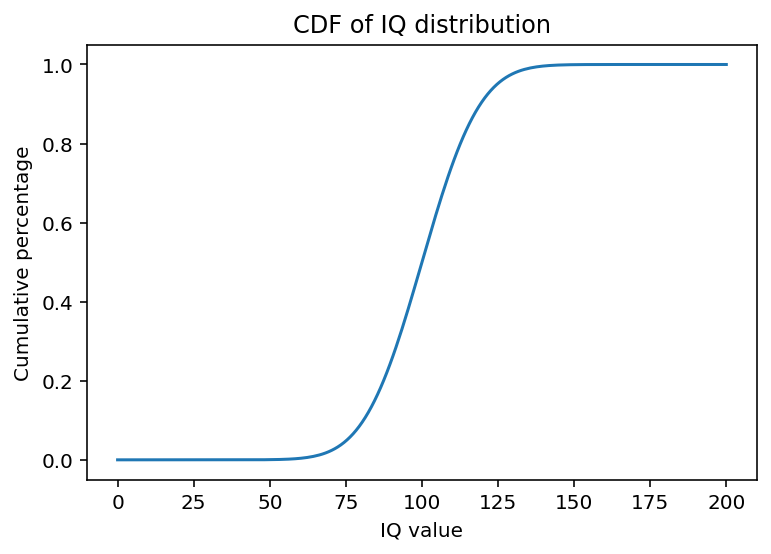

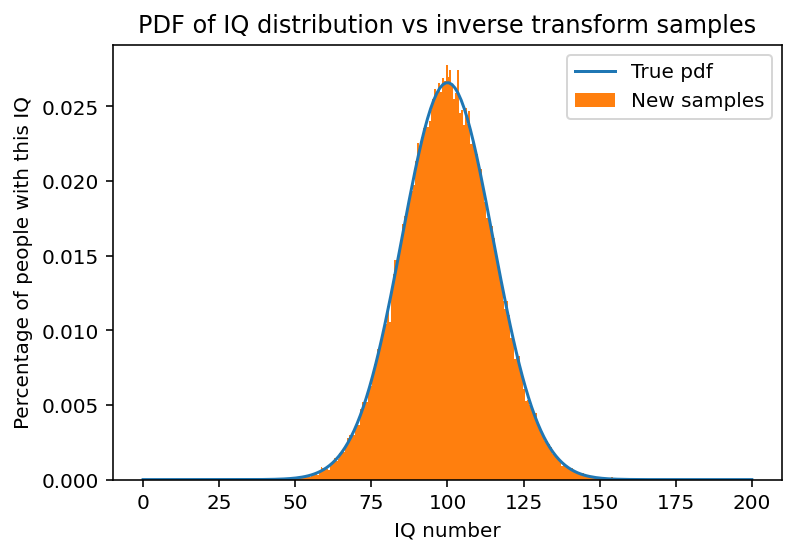

In [143]:
"""
access the cdf property of the Gaussian object and plot it over the same  𝑥 -range as in (1) 
but in a different figure. Access the ppf property (percent point function) and use 
inverse transform sampling of the cdf to draw  10^4  random samples, and make a histogram of 
these. Overplot the pdf from (1). These should match.
"""
plt.plot(x_grid,iq_norm.cdf(x_grid))
plt.title('CDF of IQ distribution')
plt.xlabel('IQ value')
plt.ylabel('Cumulative percentage')
plt.show()

N = int(10e4)
x = np.random.random(N)
samples = iq_norm.ppf(x)

#Plot the true pdf
plt.plot(x_grid,iq_norm.pdf(x_grid),label='True pdf')
#Plot the histogram of the samples
plt.hist(samples,bins=200,density=True,label='New samples')

plt.xlabel('IQ number')
plt.ylabel('Percentage of people with this IQ')
plt.title('PDF of IQ distribution vs inverse transform samples')
plt.legend(loc='upper right')
plt.show()

In [144]:
"""
What fraction of people have IQ > 145? Hint: investigate all the properties of the Gaussian 
object from (1) to find the relevant property that gives you this, or perform a calculation 
involving the cdf. """

#Since the fraction of people above a value + the fraction below = 1
# fraction above = 1 - fraction below
print(f'Fraction of people above 145 IQ = {1-iq_norm.cdf(145)}')

Fraction of people above 145 IQ = 0.0013498980316301035


In [146]:
"""
What IQ corresponds to "one in a million"?
"""
#Technically could calculate a lower IQ value that is 1 in a million, but I'm choosing upper
#As that's more positive

#Use PPF
percentile = 1 - (1/1e6) 
print(f'One in a million IQ is: {iq_norm.ppf(percentile)}')

One in a million IQ is: 171.3013646322563


## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

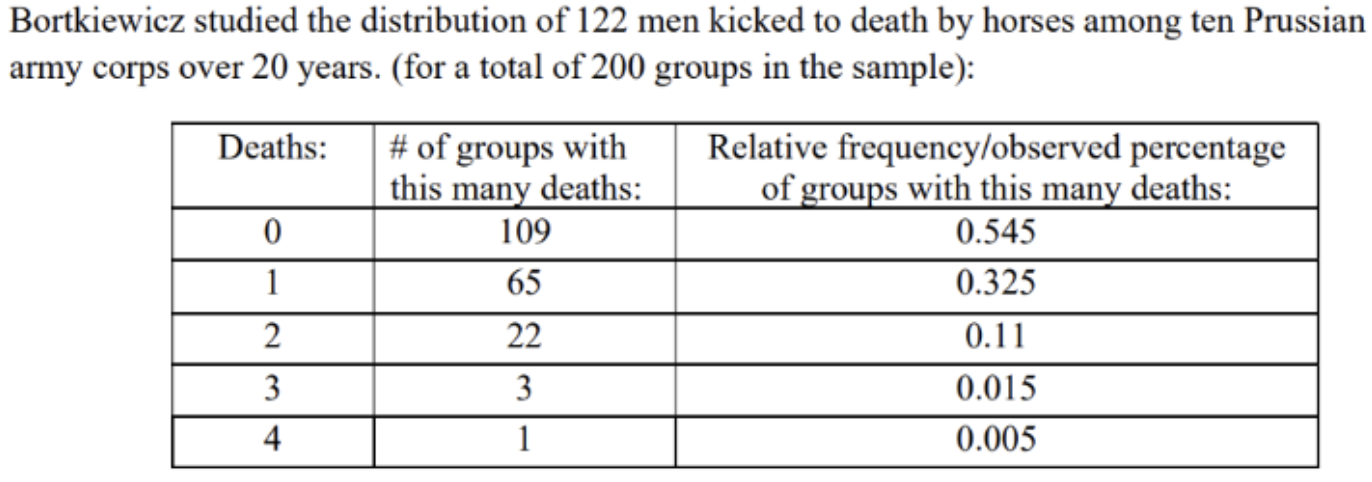

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting next week, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

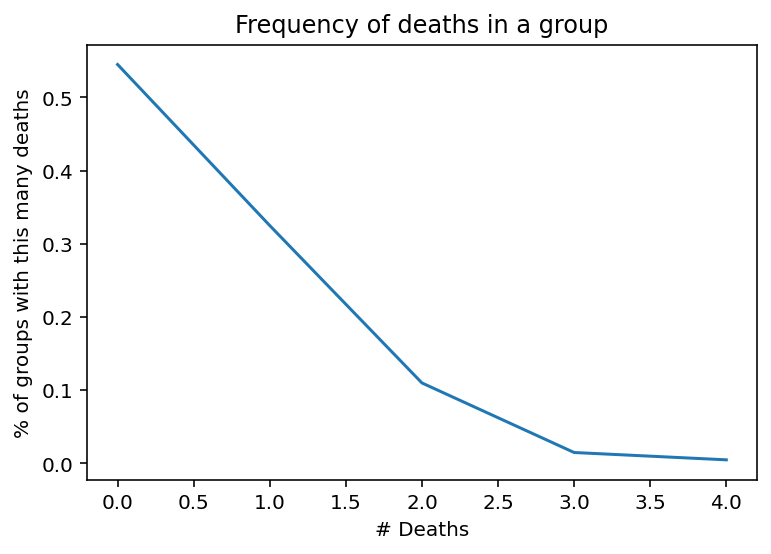

In [148]:
deaths = [0,1,2,3,4]
num_groups = [109,65,22,3,1]
freq = [0.545,0.325,.11,.015,.005]
plt.plot(deaths,freq)
plt.title('Frequency of deaths in a group')
plt.xlabel('# Deaths')
plt.ylabel('% of groups with this many deaths')
plt.show()

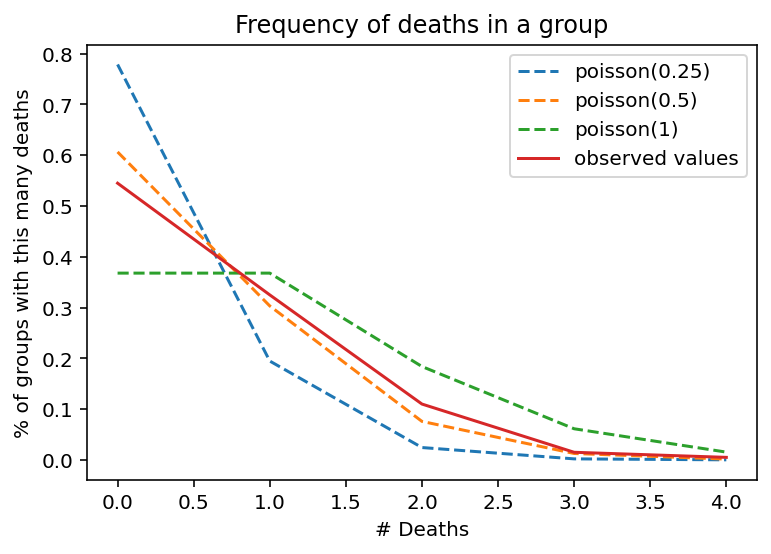

In [166]:
u_guess = [0.25,0.5,1]

ps = [poisson(u) for u in u_guess]

[plt.plot(deaths,p.pmf(deaths),'--',label=f'poisson({u})') for p,u in zip(ps,u_guess)]
      
plt.plot(deaths,freq,label='observed values')
plt.title('Frequency of deaths in a group')
plt.xlabel('# Deaths')
plt.ylabel('% of groups with this many deaths')
plt.legend(loc='upper right')
plt.show()

Calculated u: 0.61


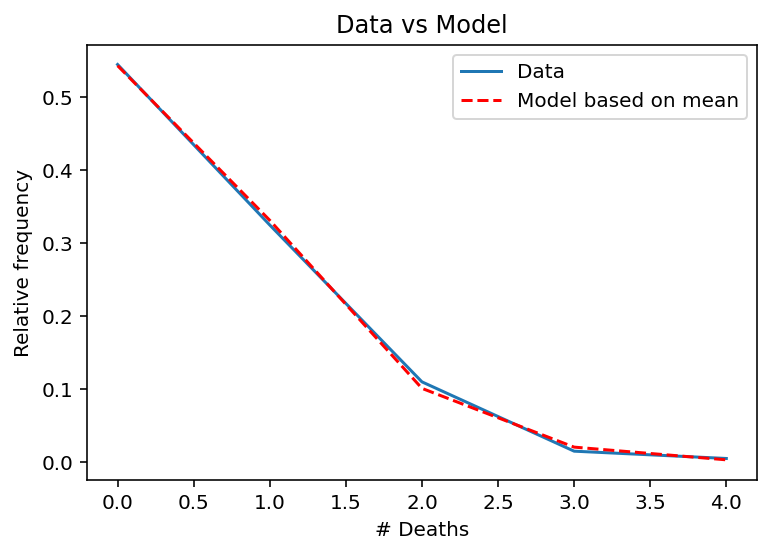

In [173]:
#Mean of a poisson dist is mu, take a weighted mean
mean = np.average(deaths,weights=num_groups)
print(f'Calculated u: {mean}')

calcP = poisson(mean)
plt.plot(deaths,freq,label='Data')
plt.plot(deaths,calcP.pmf(deaths),'r--',label='Model based on mean')
plt.title('Data vs Model')
plt.xlabel('# Deaths')
plt.ylabel('Relative frequency')
plt.legend(loc='upper right')
plt.show()